In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics

In [2]:
df = pd.read_csv('pca_data.csv', index_col=0)
target = pd.read_csv('normal_data.csv', usecols=['gap'])
df.head()

,1,2,3,4,5
0,,,,,
0.397521,-0.026781,0.106852,-0.450818,-0.159609,-0.089252
0.147343,-0.144298,-0.001357,-0.006095,-0.152672,0.016706
0.333801,-0.307708,0.045246,-0.079888,0.081616,0.150841
-0.354433,0.009432,0.263569,-0.170578,0.011204,-0.134969
0.241966,0.102004,-0.062532,-0.051126,0.023555,0.041869


Разделение по квантилям (на 3)

In [3]:
quartiles = target.quantile([0.33, 0.66])
q1 = quartiles.iloc[0]
q2 = quartiles.iloc[1]
labels = np.where(target < q1, 0, np.where(target < q2, 1, 2))

Методы кластеризации

In [5]:
# Создание объекта KMeans с заданными параметрами
kmeans = KMeans(init="random", n_clusters=3,
                n_init=10, max_iter=300, random_state=42)

In [6]:
# Применение алгоритма кластеризации KMeans к данным
clusters_kmeans = kmeans.fit_predict(df)

In [7]:
# Создание объекта AgglomerativeClustering с заданными параметрами
agglomerative = AgglomerativeClustering(n_clusters=3, linkage="ward")

In [8]:
# Применение алгоритма кластеризации AgglomerativeClustering к данным
clusters_agglomerative = agglomerative.fit_predict(df)

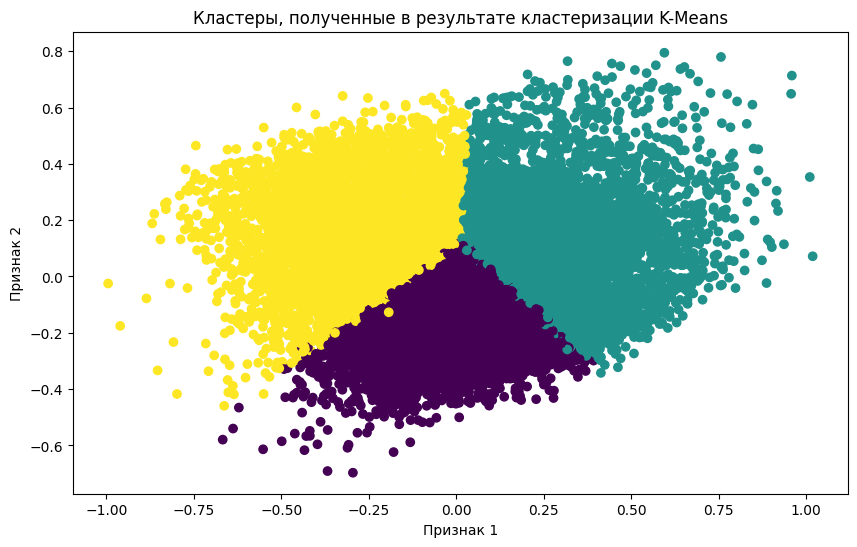

In [9]:
# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_kmeans)
plt.title('Кластеры, полученные в результате кластеризации K-Means')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

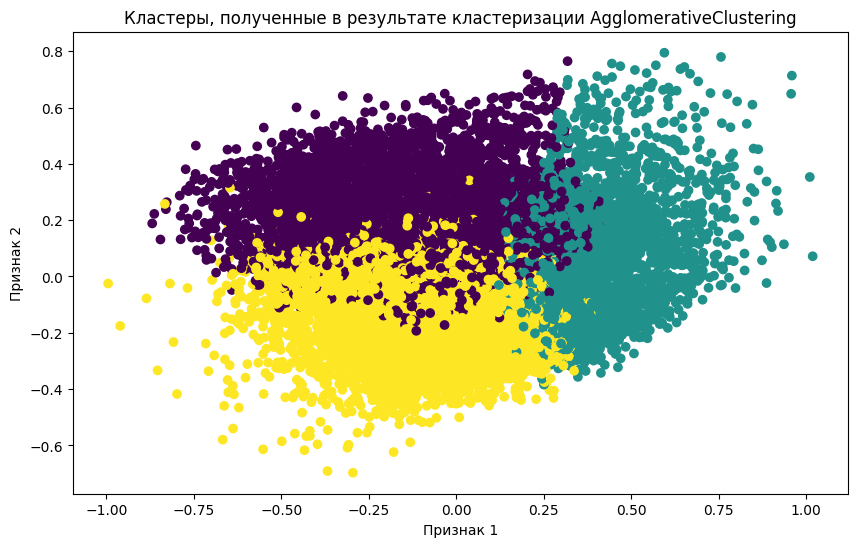

In [10]:
# Визуализация результатов кластеризации AgglomerativeClustering
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_agglomerative)
plt.title('Кластеры, полученные в результате кластеризации AgglomerativeClustering')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

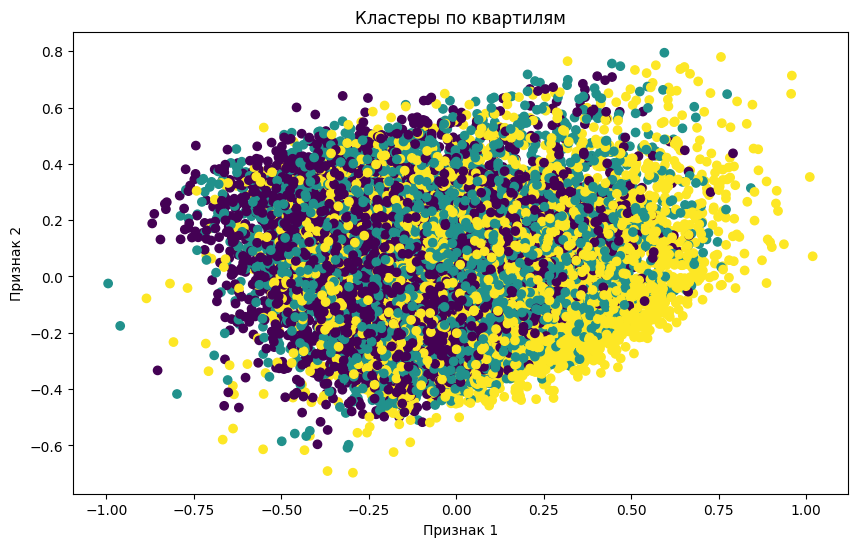

In [11]:
# Визуализация результатов кластеризации по квартилям (переменная labels не определена в вашем коде)
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.title('Кластеры по квартилям')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Средние коэффициенты методов кластеризации и индексы **ARI**

Для оценки качества кластеризации данных есть **Silhouette Score** =  *Коэффициент Силуэта*. (от минус 1 до плюс 1)

Измеряет, насколько каждый объект в кластере *похож* на другие объекты в этом же кластере и насколько *отличается* от объектов в соседних кластерах

Значения ***близкие*** к** 1** указывают на то, что два разбиения данных сильно согласуются, что говорит о ***хорошем качестве кластеризации***

In [15]:
silhouette_avg_quatiles = metrics.silhouette_score(df, labels.ravel())
silhouette_avg_kmeans = metrics.silhouette_score(df, clusters_kmeans.ravel())
silhouette_avg_agglomerative = metrics.silhouette_score(df, clusters_agglomerative.ravel())
adjusted_rand_kmeans = metrics.adjusted_rand_score(labels.ravel(), clusters_kmeans.ravel())
adjusted_rand_agglomerative = metrics.adjusted_rand_score(labels.ravel(), clusters_agglomerative.ravel())
print('Средний коэффициент силуэта по квартилям:', round(silhouette_avg_quatiles, 4),
      '\nСредний коэффициент силуэта по kmeans:', round(silhouette_avg_kmeans, 4),
      '\nСредний коэффициент силуэта по agglomerative:', round(silhouette_avg_agglomerative, 4),
      '\nARI по kmeans:', round(adjusted_rand_kmeans, 4),
      '\nARI по agglomerative:', round(adjusted_rand_agglomerative, 4))

Средний коэффициент силуэта по квартилям: 0.0189 
Средний коэффициент силуэта по kmeans: 0.2318 
Средний коэффициент силуэта по agglomerative: 0.1657 
ARI по kmeans: 0.0274 
ARI по agglomerative: 0.0191
